# Potato Disease Classification using Deep Learning

This project presents an end-to-end deep learning pipeline for the classification of potato leaf diseases using convolutional neural networks (CNNs). The model aims to assist in early disease detection to improve crop health and yield.


## 1. Introduction

Potato is one of the most widely consumed food crops worldwide. However, potato plants are highly susceptible to various leaf diseases such as Early Blight and Late Blight, which can significantly reduce crop yield and quality.
Traditional disease detection methods rely on manual inspection by experts, which is time-consuming and prone to human error. This project proposes a deep learning-based approach to automatically classify potato leaf images into different disease categories using convolutional neural networks.

## 2. Objective of the Project

The primary objectives of this project are:
- To build an automated system for potato leaf disease classification using deep learning.
- To preprocess and augment image data for improved model generalization.
- To train a CNN model capable of classifying multiple disease classes.
- To evaluate model performance using appropriate metrics.


## 3. Dataset Description

The dataset consists of labeled images of potato leaves categorized into different classes:
- Healthy
- Early Blight
- Late Blight

## 4. Importing Required Libraries
In this section, all necessary Python libraries for data processing, visualization, and deep learning model development are imported.

In [64]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import os
import numpy as np

## 5. Data Loading and Exploration

Images were resized to 256×256 to match CNN input requirements.


In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [3]:
dataset= tf.keras.preprocessing.image_dataset_from_directory(
    "Potato_dataset",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset)

68

## 6. Data Visualization

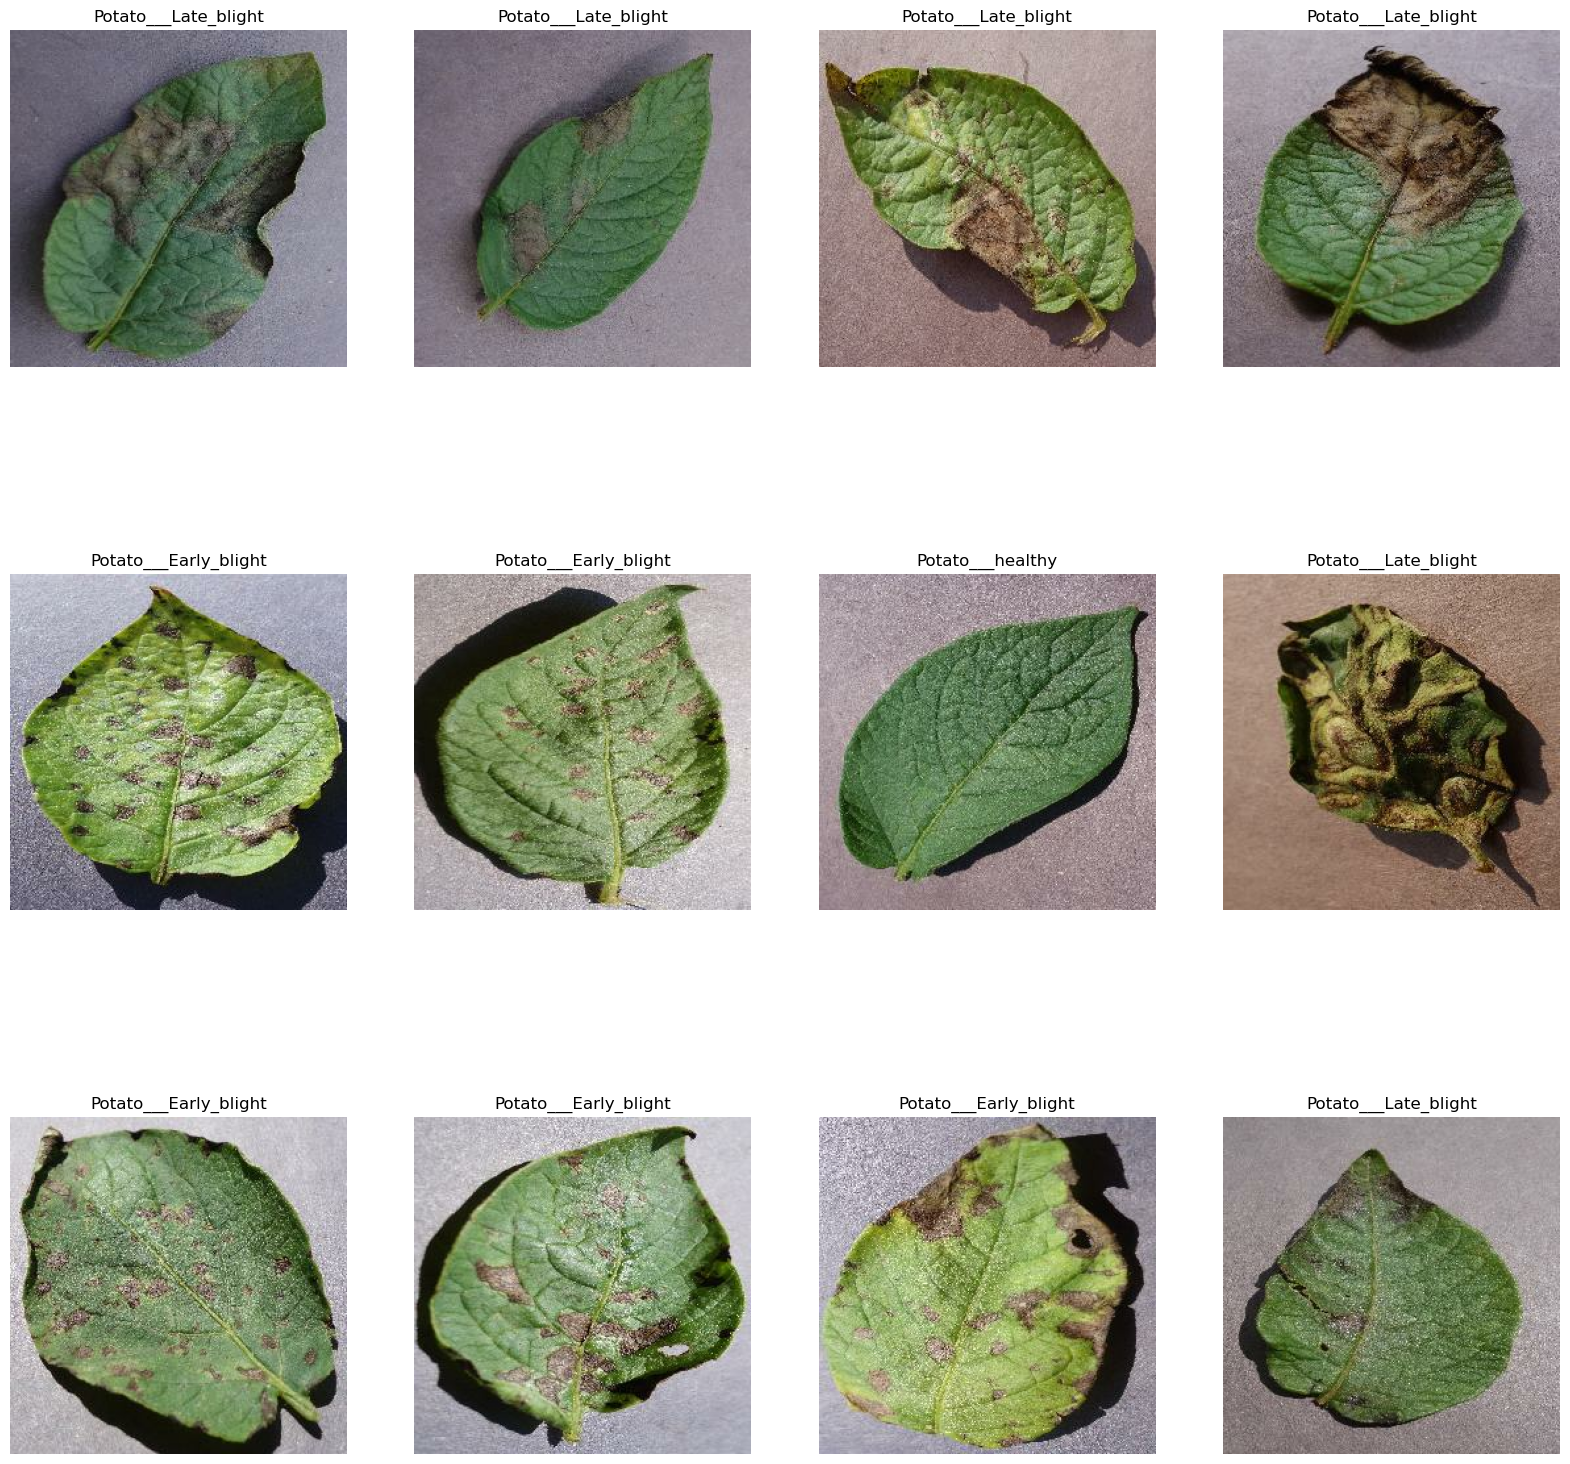

In [6]:
plt.figure(figsize = (20,20))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [7]:
len(dataset)

68

In [8]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [9]:
train_ds = dataset.take(54)
len(train_ds)

54

In [10]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [11]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [12]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [13]:
def get_dataset_partitions_tf(ds,train_split = 0.8, val_split = 0.1, test_split = 0.1, shuffle = True , shuffle_size = 10000):
    
    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)

    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [14]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [15]:
len(train_ds)

54

In [16]:
len(val_ds)

6

In [17]:
len(test_ds)

8

## 7. Data Preprocessing and Augmentation

Data preprocessing includes resizing of images.
Data augmentation techniques such as random flipping and rotation are applied to increase dataset diversity and reduce overfitting.


In [18]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [19]:
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    tf.keras.layers.Rescaling(1.0/255)
])

In [20]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertial"),
    tf.keras.layers.RandomRotation(0.2),
])

## 8. Model Architecture

Conv2D → feature extraction

MaxPooling → dimensionality reduction

Softmax → multi-class classification


In [21]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation = 'relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(n_classes, activation = 'softmax'),
]) 

model.build(input_shape = input_shape)

C:\Users\Victus\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (32, 254, 254, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (32, 127, 127, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (32, 125, 125, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (32, 62, 62, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (32, 60, 60, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (32, 30, 30, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (32, 28, 28, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (32, 14, 14, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (32, 12, 12, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (32, 6, 6, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (32, 4, 4, 64)              │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (32, 2, 2, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (32, 256)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (32, 64)                    │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 3)                     │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

## 9. Model Compilation

The model is compiled using the Adam optimizer, which provides efficient gradient-based optimization. Sparse categorical cross-entropy is used as the loss function since the problem involves multi-class classification.

Model accuracy is used as the primary evaluation metric.

In [23]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']
)

## 10. Model Training

The CNN model is trained using the training dataset, with validation data used to monitor performance during training. Training is conducted for a fixed number of epochs to observe learning behavior and convergence.


In [24]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
    )

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 128s 2s/step - accuracy: 0.4751 - loss: 0.9249 - val_accuracy: 0.4375 - val_loss: 0.8898
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 115s 2s/step - accuracy: 0.5590 - loss: 0.8591 - val_accuracy: 0.6719 - val_loss: 0.7405
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 113s 2s/step - accuracy: 0.7552 - loss: 0.5607 - val_accuracy: 0.6979 - val_loss: 0.6051
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 109s 2s/step - accuracy: 0.8640 - loss: 0.3215 - val_accuracy: 0.8698 - val_loss: 0.3278
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 112s 2s/step - accuracy: 0.9045 - loss: 0.2590 - val_accuracy: 0.8802 - val_loss: 0.2815
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 116s 2s/step - accuracy: 0.9161 - loss: 0.2173 - val_accuracy: 0.9167 - val_loss: 0.2277
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 219s 4s/step - accuracy: 0.9352 - loss: 0.1609 - val_accuracy: 0.8698 - val_loss: 0.3376
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 287s 5s/step - accuracy: 0.9265 - loss: 0.1856 - val_accuracy: 0.9427 - v

In [25]:
len(test_ds)

8

In [26]:
scores = model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.9609 - loss: 0.0735  


In [27]:
scores

[0.07346000522375107, 0.9609375]

In [29]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [32]:
len(history.history['accuracy'])

50

## 11. Performance Visualization

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

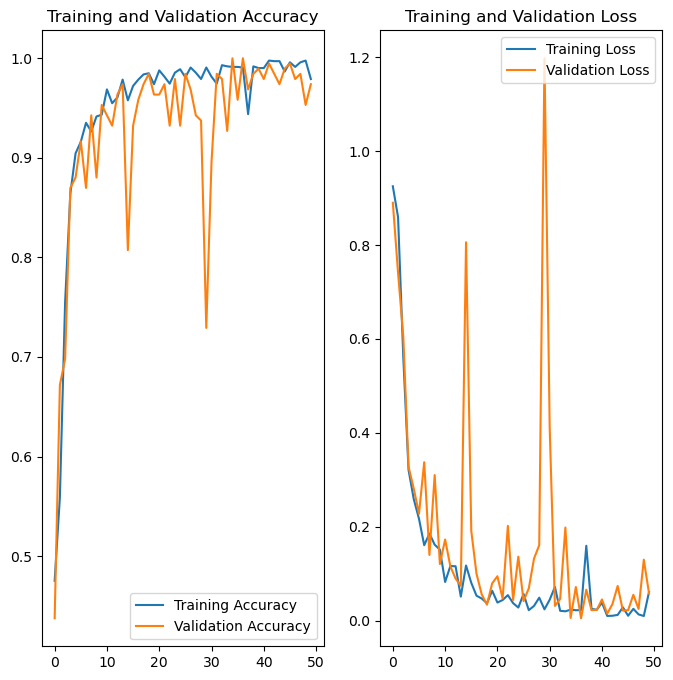

In [34]:
plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc , label = "Training Accuracy")
plt.plot(range(EPOCHS), val_acc , label = "Validation Accuracy")
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss , label = "Training Loss")
plt.plot(range(EPOCHS), val_loss , label = "Validation Loss")
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')
plt.show()

## 12. Model Inference on Test Images

In this section, the trained deep learning model is used to perform inference on unseen test images. A batch of images is retrieved from the test dataset, and a single image is selected for demonstration.

The actual class label of the selected image is displayed alongside the predicted label generated by the trained model. This step validates the real-world applicability of the model by comparing ground truth labels with predicted outcomes.


First image to predict
Actual Label: Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted Label: Potato___Early_blight


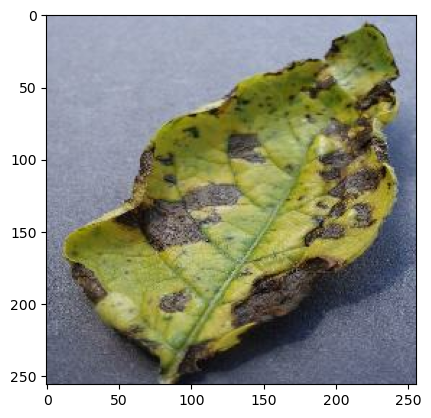

In [46]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):

    first_image = images_batch[0].numpy().astype("uint8")
    
    print("First image to predict")
    plt.imshow(first_image)
    print("Actual Label:", class_names[labels_batch[0].numpy()])

    batch_prediction = model.predict(images_batch)
    print("Predicted Label:", class_names[np.argmax(batch_prediction[0])])

## 13 Prediction Function Definition

To improve code modularity and reusability, a dedicated prediction function is defined. This function accepts a trained model and a single input image, preprocesses the image into the required format, and returns the predicted disease class along with the confidence score.

Encapsulating the prediction logic inside a function enables cleaner code structure and simplifies inference on new images.


In [50]:
#converting image to array and creating a batch
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])),2)
    return predicted_class, confidence

## 14 Batch Prediction Visualization

In this section, the trained model is evaluated visually by performing predictions on multiple images from the test dataset. A batch of test images is selected, and predictions are generated for each image.

The actual class label, predicted class label, and prediction confidence are displayed for each image in a grid format. This qualitative analysis helps in assessing the model’s performance and reliability beyond numerical evaluation metrics.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 642ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


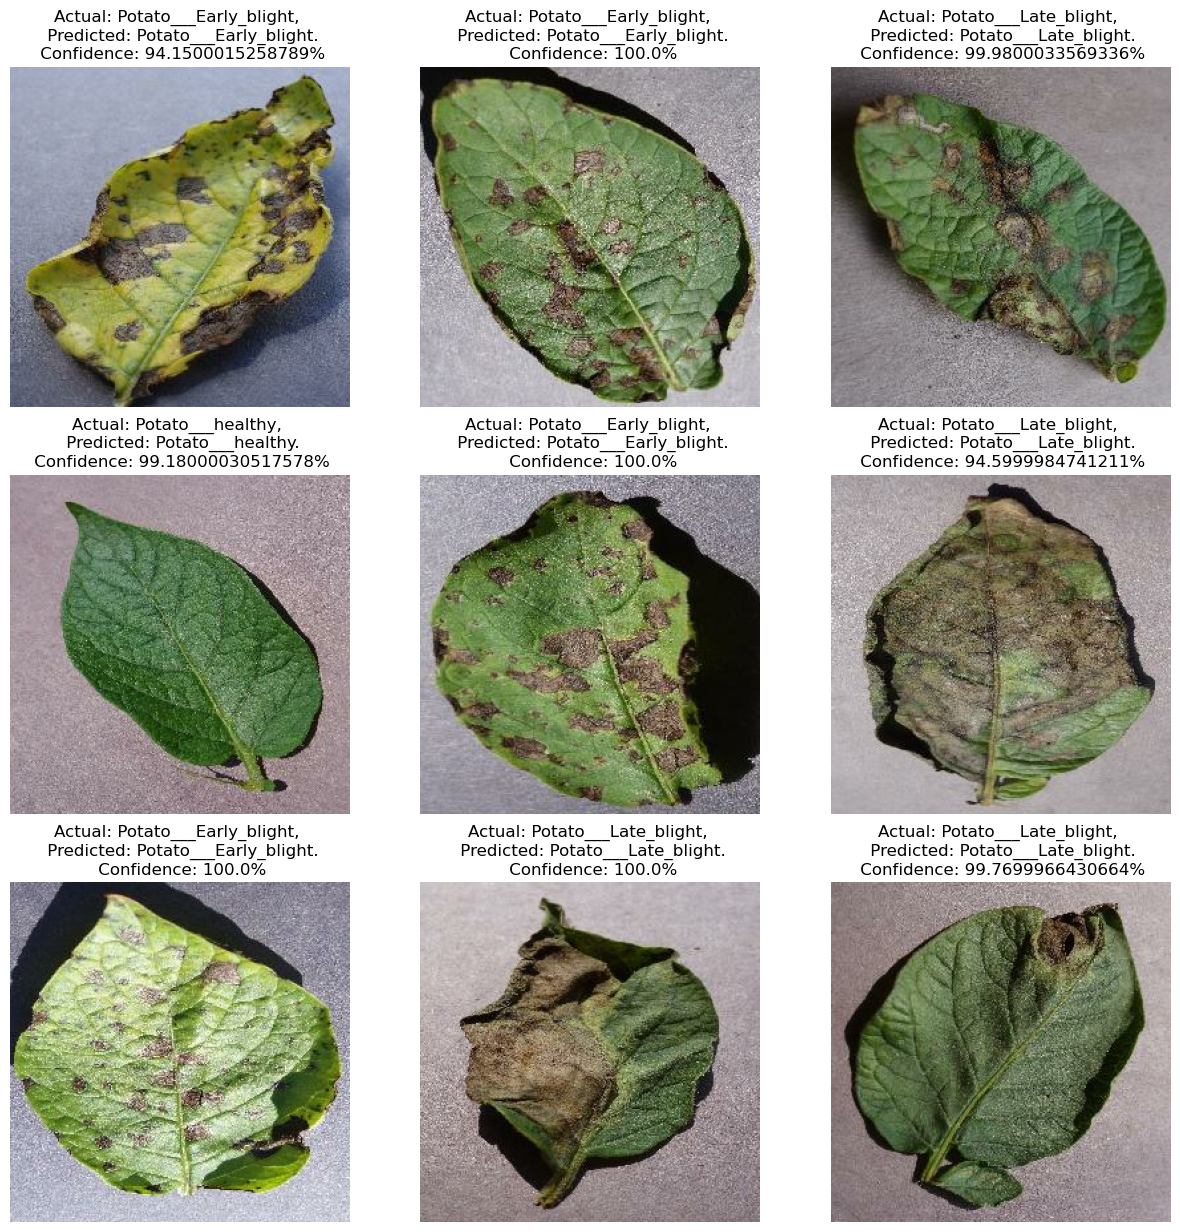

In [52]:
plt.figure(figsize = (15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class,confidence = predict(model, images[i].numpy())

        actual_class = class_names[labels[i]]
        plt.title(f"Actual: {actual_class}, \n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        plt.axis("off")

## 15. Saving the Trained Model

In [69]:
import os
os.makedirs("Project(Potato)/models", exist_ok=True)
model_version = max([int(i.split('.')[0]) for i in (os.listdir("Project(Potato)/models") + ["0"])]) + 1
model.save(f"Project(Potato)/models/{model_version}.keras")

## 15. Conclusion

This project demonstrates the successful application of deep learning techniques for automated potato leaf disease classification. The developed CNN model effectively learns discriminative features from leaf images and provides reliable predictions.

Such systems can support farmers and agricultural experts by enabling early disease detection and timely intervention.
